In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# URL of the website
url = "https://digital.nhs.uk/data-and-information/publications/statistical/cancer-registration-statistics/england-2021---summary-counts-only/cancer-incidence"

In [3]:
# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables on the page
tables = soup.find_all("table")

# Initialize an empty list to store the data
data = []


In [4]:
# Iterate through each table
for table in tables:
    # Extract the data from each row
    rows = table.find_all("tr")
    for row in rows:
        # Extract the data from each cell in the row
        cells = row.find_all(["th", "td"])
        row_data = [cell.get_text(strip=True) for cell in cells]
        data.append(row_data)

In [5]:
# Create a DataFrame from the extracted data
df = pd.DataFrame(data)
df.to_csv(r'C:\Users\MY LAPTOP\Documents\DATAWORLD\Data Scraping\Cancer_Stats2.csv', index = False)

print('file exported')

file exported


In [6]:
#Data is further pre-processed in Excel

# VISUALIZATION

In [7]:
# Read data from both sheets
males_df = pd.read_csv(r'C:\Users\MY LAPTOP\Documents\DATAWORLD\Data Scraping\Cancer_Stats\Males.csv')
females_df = pd.read_csv(r'C:\Users\MY LAPTOP\Documents\DATAWORLD\Data Scraping\Cancer_Stats\Females.csv')

In [8]:
males_df

,Cancer site,Diagnoses registered in 2019,Diagnoses registered in 2021,Change in the number of diagnoses registered,Proportionate change in the number of diagnoses registered (%)
0,Prostate,47479,43378,-4101,-9
1,Lung,20742,20312,-430,-2
2,Bowel,20920,23288,2368,11
3,Bladder,6535,6858,323,5
4,Melanoma of skin,7782,8078,296,4
5,Non-Hodgkin lymphoma,6633,6526,-107,-2
6,Kidney,6485,6598,113,2
7,"Lip, oral cavity and pharynx",5620,6063,443,8
8,Oesophagus,5437,5376,-61,-1
9,Pancreas,4738,4870,132,3


In [9]:
print(females_df.dtypes)

Cancer site                                                       object
Diagnoses registered in 2019                                       int64
Diagnoses registered in 2021                                       int64
Change in the number of diagnoses registered                       int64
Proportionate change in the number of diagnoses registered (%)     int64
dtype: object


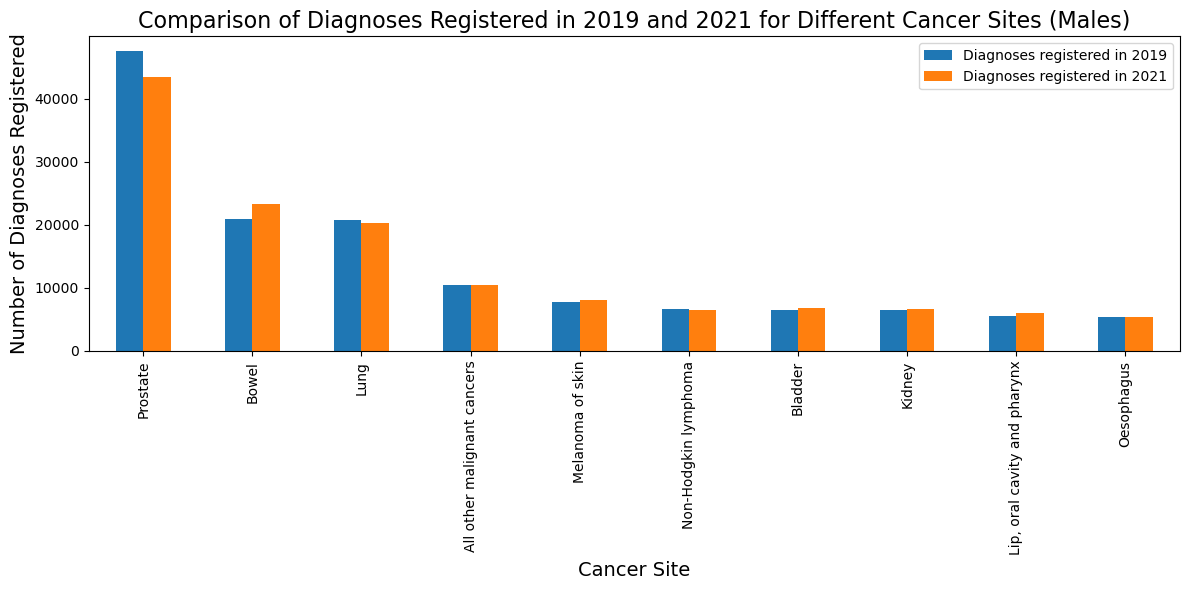

In [10]:
# Sort the dataframe by the sum of diagnoses registered for both years
males_df_sorted = males_df.sort_values(by=['Diagnoses registered in 2019', 'Diagnoses registered in 2021'], ascending=False)

# Select only the top 10 variables
top_10_df = males_df_sorted.head(10)

# Comparison of diagnoses registered in 2019 and 2021
plt.figure(figsize=(12, 6))

# Using bar plot for visualization
top_10_df.plot(kind='bar', x='Cancer site', y=['Diagnoses registered in 2019', 'Diagnoses registered in 2021'], ax=plt.gca())

# Adding title and labels
plt.title('Comparison of Diagnoses Registered in 2019 and 2021 for Different Cancer Sites (Males)', fontsize=16)
plt.xlabel('Cancer Site', fontsize=14)
plt.ylabel('Number of Diagnoses Registered', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Ensuring tight layout for better spacing
plt.tight_layout()

# Displaying the plot
plt.show()

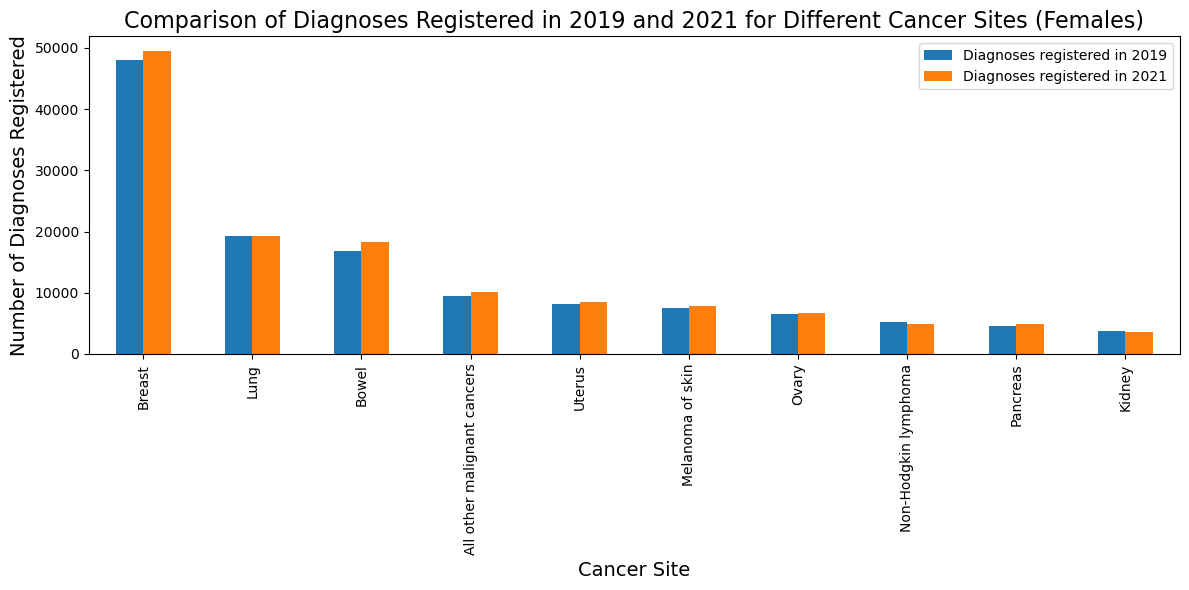

In [11]:
# Sort the dataframe by the sum of diagnoses registered for both years
females_df_sorted = females_df.sort_values(by=['Diagnoses registered in 2019', 'Diagnoses registered in 2021'], ascending=False)

# Select only the top 10 variables
top_10_df = females_df_sorted.head(10)

# Comparison of diagnoses registered in 2019 and 2021
plt.figure(figsize=(12, 6))

# Using bar plot for visualization
top_10_df.plot(kind='bar', x='Cancer site', y=['Diagnoses registered in 2019', 'Diagnoses registered in 2021'], ax=plt.gca())

# Adding title and labels
plt.title('Comparison of Diagnoses Registered in 2019 and 2021 for Different Cancer Sites (Females)', fontsize=16)
plt.xlabel('Cancer Site', fontsize=14)
plt.ylabel('Number of Diagnoses Registered', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Ensuring tight layout for better spacing
plt.tight_layout()

# Displaying the plot
plt.show()

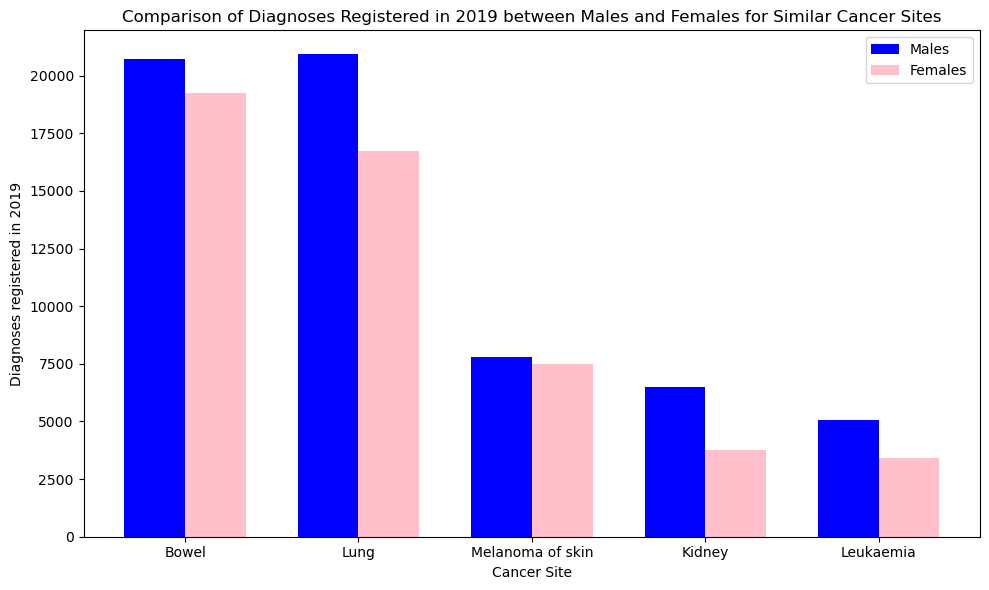

In [12]:
# Specify the cancer sites of interest
cancer_sites = ['Bowel', 'Lung', 'Melanoma of skin', 'Kidney', 'Leukaemia']

# Filter data for the specified cancer sites and the variable "Diagnoses registered in 2019"
males_filtered = males_df[males_df['Cancer site'].isin(cancer_sites)]
females_filtered = females_df[females_df['Cancer site'].isin(cancer_sites)]

# Plot comparison between males and females for the variable "Diagnoses registered in 2019"
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(cancer_sites))

plt.bar(index, males_filtered['Diagnoses registered in 2019'], bar_width, color='blue', label='Males')
plt.bar([i + bar_width for i in index], females_filtered['Diagnoses registered in 2019'], bar_width, color='pink', label='Females')

plt.xlabel('Cancer Site')
plt.ylabel('Diagnoses registered in 2019')
plt.title('Comparison of Diagnoses Registered in 2019 between Males and Females for Similar Cancer Sites')
plt.xticks([i + bar_width / 2 for i in index], cancer_sites)
plt.legend()
plt.tight_layout()
plt.show()

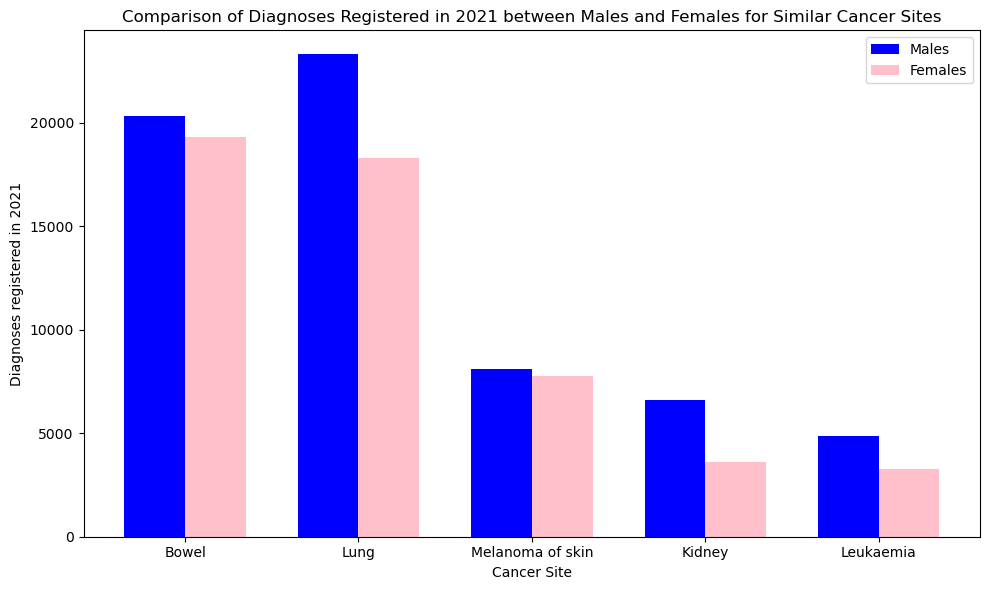

In [13]:
# Specify the cancer sites of interest
cancer_sites = ['Bowel', 'Lung', 'Melanoma of skin', 'Kidney', 'Leukaemia']

# Filter data for the specified cancer sites and the variable "Diagnoses registered in 2021"
males_filtered = males_df[males_df['Cancer site'].isin(cancer_sites)]
females_filtered = females_df[females_df['Cancer site'].isin(cancer_sites)]

# Plot comparison between males and females for the variable "Diagnoses registered in 2021"
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(cancer_sites))

plt.bar(index, males_filtered['Diagnoses registered in 2021'], bar_width, color='blue', label='Males')
plt.bar([i + bar_width for i in index], females_filtered['Diagnoses registered in 2021'], bar_width, color='pink', label='Females')

plt.xlabel('Cancer Site')
plt.ylabel('Diagnoses registered in 2021')
plt.title('Comparison of Diagnoses Registered in 2021 between Males and Females for Similar Cancer Sites')
plt.xticks([i + bar_width / 2 for i in index], cancer_sites)
plt.legend()
plt.tight_layout()
plt.show()

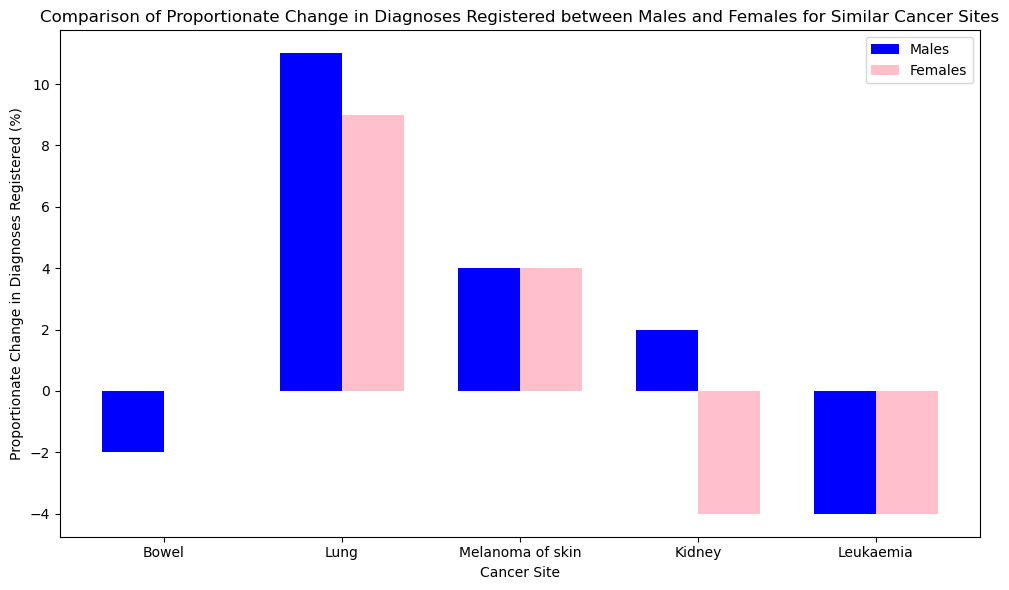

In [14]:
# Specify the cancer sites of interest
cancer_sites = ['Bowel', 'Lung', 'Melanoma of skin', 'Kidney', 'Leukaemia']

# Filter data for the specified cancer sites and the variable "Proportionate change in the number of diagnoses registered"
males_filtered = males_df[males_df['Cancer site'].isin(cancer_sites)]
females_filtered = females_df[females_df['Cancer site'].isin(cancer_sites)]

# Plot comparison between males and females for the variable "Proportionate change in the number of diagnoses registered"
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(cancer_sites))

plt.bar(index, males_filtered['Proportionate change in the number of diagnoses registered (%)'], bar_width, color='blue', label='Males')
plt.bar([i + bar_width for i in index], females_filtered['Proportionate change in the number of diagnoses registered (%)'], bar_width, color='pink', label='Females')

plt.xlabel('Cancer Site')
plt.ylabel('Proportionate Change in Diagnoses Registered (%)')
plt.title('Comparison of Proportionate Change in Diagnoses Registered between Males and Females for Similar Cancer Sites')
plt.xticks([i + bar_width / 2 for i in index], cancer_sites)
plt.legend()
plt.tight_layout()
plt.show()